# DAT257x: Reinforcement Learning Explained

## Lab 6: Function Approximation

### Exercise 6.1: Q-Learning Agent with Linear Function Approximation

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
class QLearningFAAgent(Agent):
    def __init__(self, actions, obs_size, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningFAAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize thetas here
        self.thetas = np.zeros(64)
        
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.epsilon = epsilon
        self.alpha   = alpha
        self.gamma   = gamma
        
    def featureExtractor(self, state, action):
        feature = None
        
        actionindex = np.zeros(self.num_actions, dtype=np.int)
        actionindex[action] = 1
        feature = np.concatenate([actionindex[i] * state for i in self.actions])
        return feature    
            
    def act(self, state):
        ## epsilon greedy policy 
        if np.random.random() < self.epsilon:
            i = np.random.randint(0,len(self.actions))
        else:
            q = [np.sum(self.thetas.transpose() * self.featureExtractor(state, a)) for a in self.actions]
            
            if q.count(max(q)) > 1:
                best = [i for i in range(len(self.actions)) if q[i] == max(q)]
                i = np.random.choice(best)
            else:
                i = q.index(max(q))
            
        action = self.actions[i]
        return action           
            
    def learn(self, state1, action1, reward, state2, done):
        
        """
        Q-learning with FA 
        theta <- theta + alpha * td_delta * f(s,a)
        where 
        td_delta = reward + gamma * max(Q(s') - Q(s,a))
        Q(s,a) = thetas * f(s,a)
        max(Q(s')) = max( [ thetas * f(s'a) for a in all actions] )
        
        """
        ## TODO 3
        ## Implement the q-learning update here
        
        maxqnew = max( [np.sum( self.thetas.transpose() * self.featureExtractor(state2, a) ) for a in self.actions] )
        oldv = np.sum( self.thetas.transpose() * self.featureExtractor(state1, action1) )
        
        td_target = reward + self.gamma * maxqnew
        td_delta = td_target - oldv
        self.thetas += self.alpha * td_delta * self.featureExtractor(state1, action1)

<IPython.core.display.Javascript object>


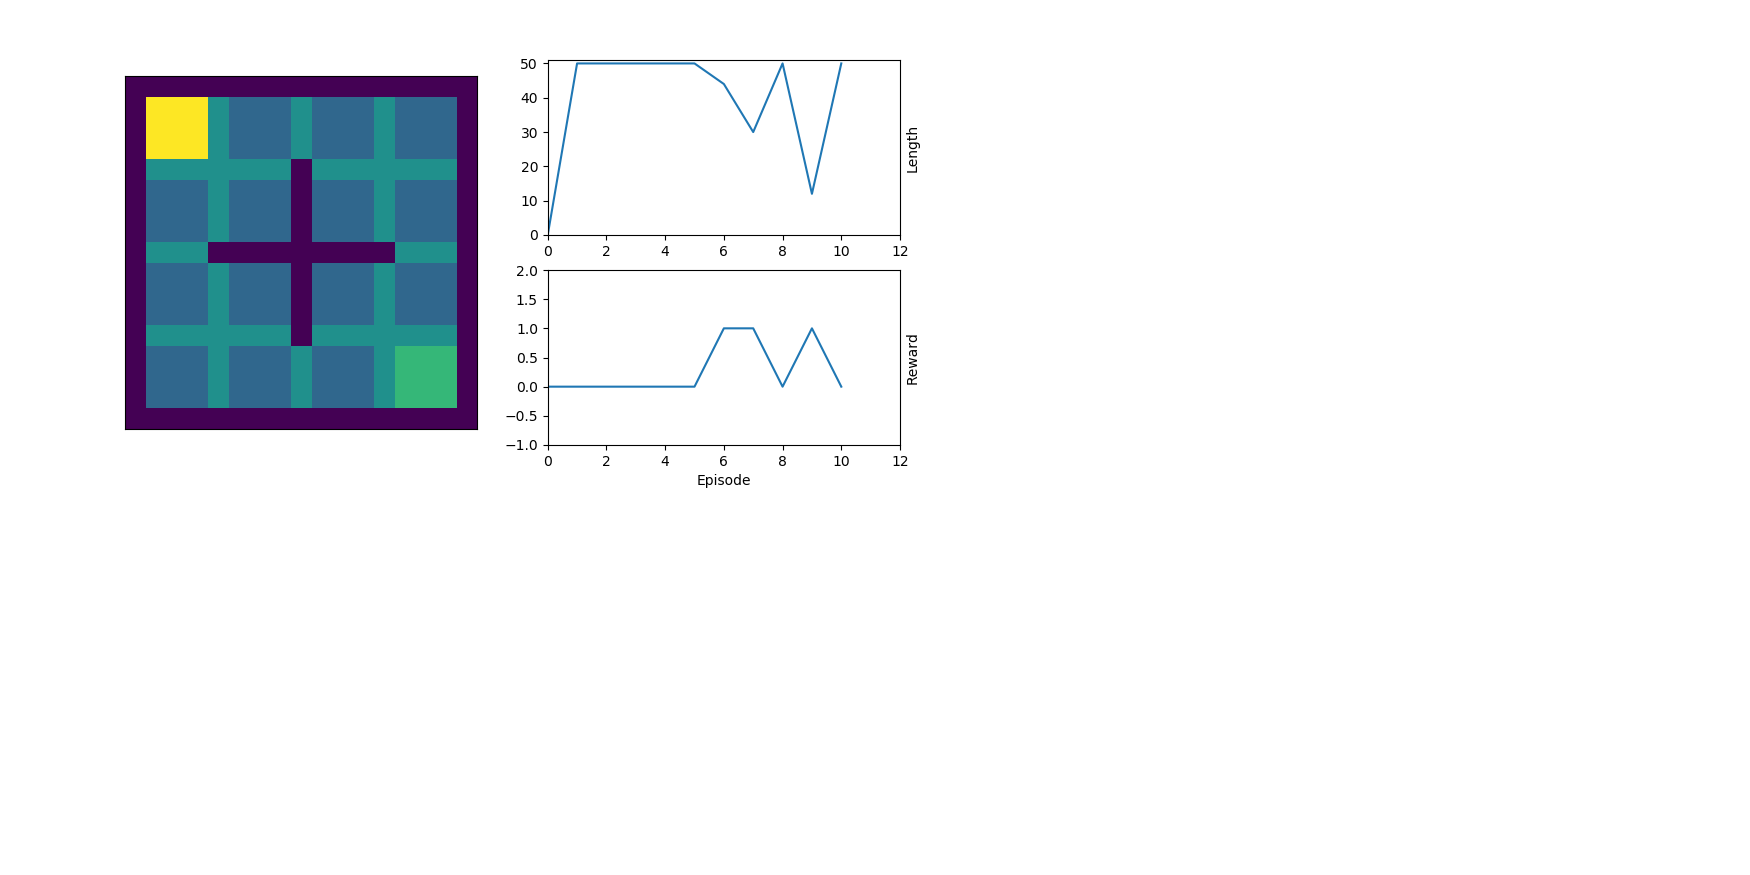

In [4]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningFAAgent(range(env.action_space.n),16)
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

<Figure size 720x360 with 0 Axes>

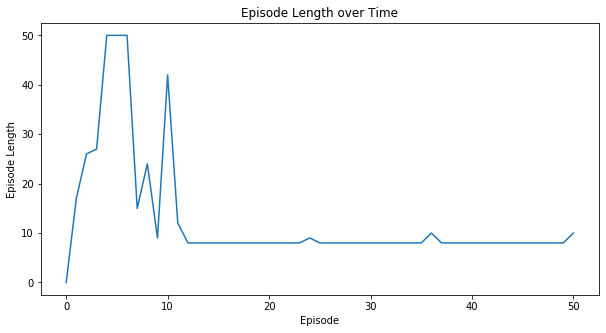

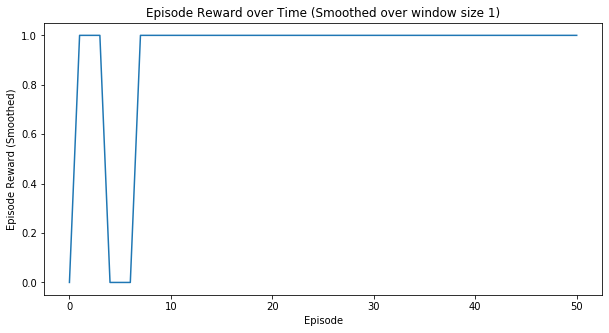

In [5]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningFAAgent(range(env.action_space.n),16)
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)